In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [8]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [9]:
if 'occupation' in df.columns:
    df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)

if 'workclass' in df.columns:
    df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)

if 'education' in df.columns:
    df = df.drop('education', axis=1)

if 'marital-status' in df.columns:
    df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)

if 'relationship' in df.columns:
    df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

if 'race' in df.columns:
    df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)

if 'native-country' in df.columns:
    df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)


In [10]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [11]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  #lambda when used acts as inline function which eliminates the need for creating a separate variable additionally

In [12]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [13]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

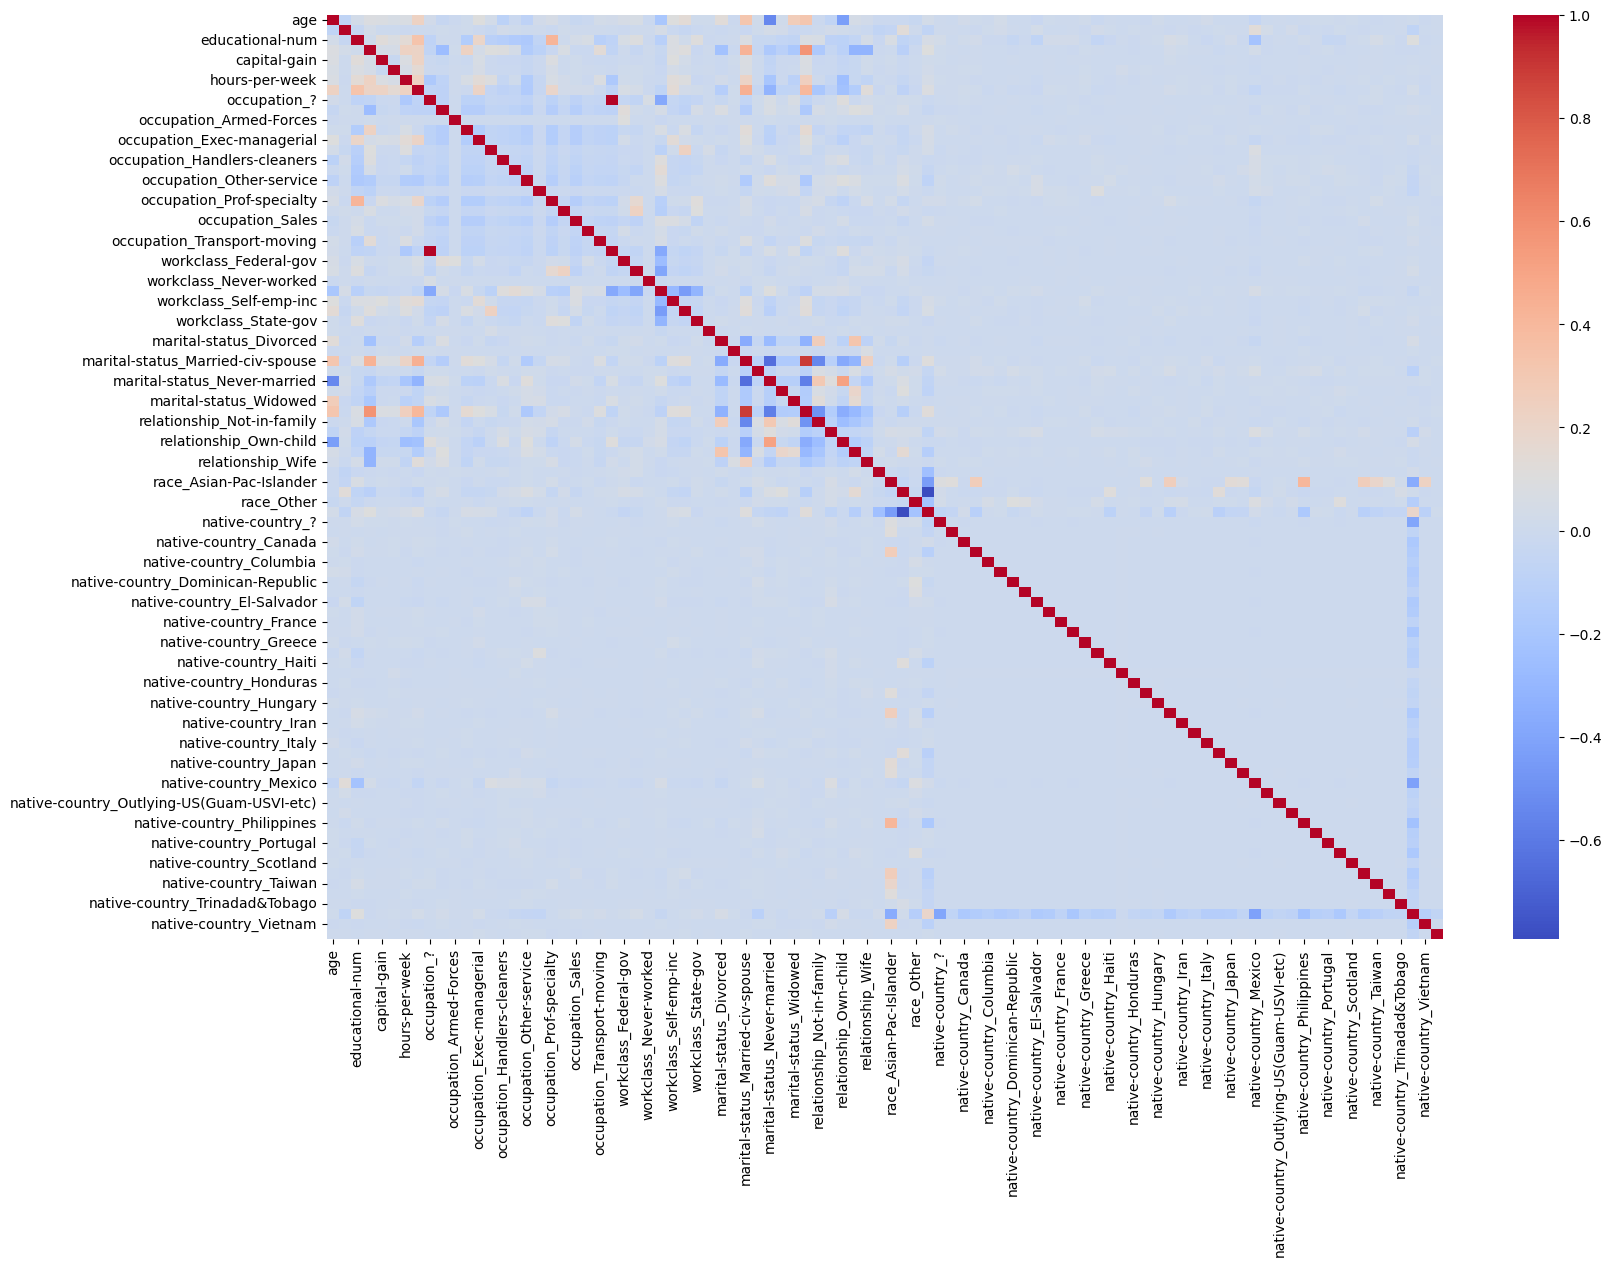

In [14]:
#dropping the ones that are least imp

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [15]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [16]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8* len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [17]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

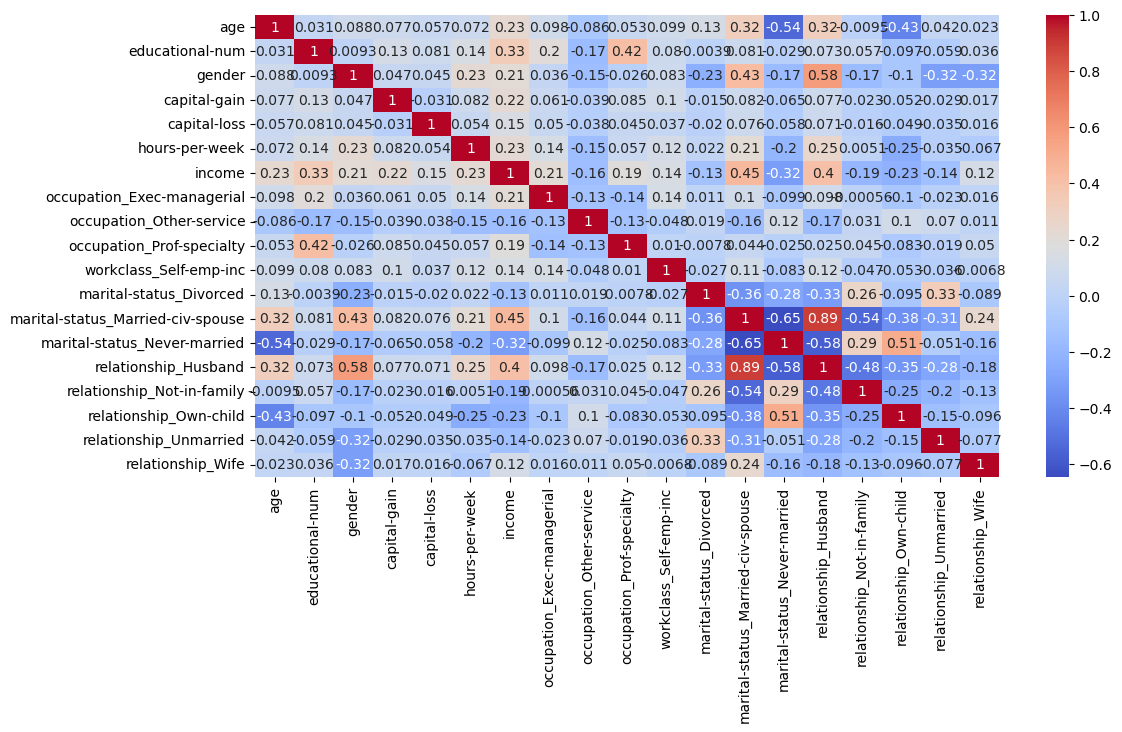

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [33]:
#using random forest since it is decision based at this point

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df=df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [34]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
11602,36,9,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45792,29,10,1,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1256,30,14,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10601,44,10,1,0,0,35,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37786,46,13,1,0,0,48,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41655,29,9,0,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
23354,56,9,1,0,0,44,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45075,21,10,1,0,0,32,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45171,30,13,0,3103,0,55,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
14250,36,11,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
30408,36,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3905,29,9,1,0,0,37,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
22111,60,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5977,18,9,0,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27877,52,13,1,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40127,42,9,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
26145,34,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2695,50,13,0,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
X_train = train_df.drop('income' , axis=1)
y_train = train_df['income']

X_test = test_df.drop('income' , axis=1)
y_test = test_df['income']

In [37]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
forest.feature_importances_

array([2.30352726e-01, 1.28758789e-01, 1.35087910e-02, 1.10269848e-01,
       3.77866595e-02, 1.13119480e-01, 1.97154234e-03, 5.04282442e-03,
       8.99575801e-05, 6.18780236e-03, 1.92319596e-02, 4.57623078e-03,
       3.51180164e-03, 4.23439381e-03, 7.92769474e-03, 2.53460227e-04,
       1.55815039e-02, 2.86951157e-03, 6.29944875e-03, 4.33557929e-03,
       4.22314596e-03, 1.65640604e-03, 4.86740406e-03, 5.37135206e-03,
       9.42368789e-08, 9.31587604e-03, 5.67596073e-03, 8.19373594e-03,
       4.07377487e-03, 9.27303782e-05, 6.44979872e-03, 3.68728953e-04,
       7.66116957e-02, 9.48085348e-04, 2.19023156e-02, 1.76907537e-03,
       1.88931392e-03, 4.58792322e-02, 8.97868247e-03, 1.89446543e-03,
       1.18808222e-02, 7.57670948e-03, 1.02902507e-02, 1.45919271e-03,
       3.02184565e-03, 4.76123383e-03, 9.25406657e-04, 5.96334019e-03,
       2.82799521e-03, 2.93109796e-04, 1.44646871e-03, 5.40677755e-04,
       2.24350532e-04, 8.09252554e-04, 2.04337144e-04, 1.61638476e-04,
      

In [39]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [40]:
dict(zip(forest.feature_names_in_, forest.feature_importances_))

{'age': 0.23035272578897056,
 'educational-num': 0.12875878930627593,
 'gender': 0.013508791030398747,
 'capital-gain': 0.11026984836029896,
 'capital-loss': 0.037786659457370954,
 'hours-per-week': 0.1131194802885704,
 'occupation_?': 0.0019715423435352555,
 'occupation_Adm-clerical': 0.005042824415435624,
 'occupation_Armed-Forces': 8.9957580090879e-05,
 'occupation_Craft-repair': 0.0061878023550875575,
 'occupation_Exec-managerial': 0.019231959614313832,
 'occupation_Farming-fishing': 0.004576230781858663,
 'occupation_Handlers-cleaners': 0.0035118016438938702,
 'occupation_Machine-op-inspct': 0.004234393806495064,
 'occupation_Other-service': 0.007927694735151885,
 'occupation_Priv-house-serv': 0.00025346022694745074,
 'occupation_Prof-specialty': 0.015581503898322972,
 'occupation_Protective-serv': 0.0028695115705324775,
 'occupation_Sales': 0.006299448747163246,
 'occupation_Tech-support': 0.004335579289885651,
 'occupation_Transport-moving': 0.004223145955077928,
 'workclass_?':